# Test 1: Contour plot on random nonlinear data

/tmp/ipykernel_13857/2672810611.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


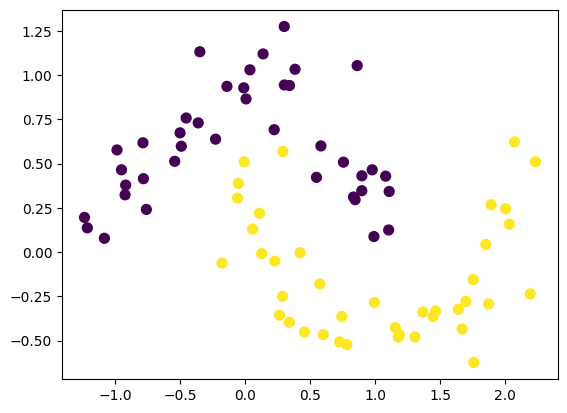

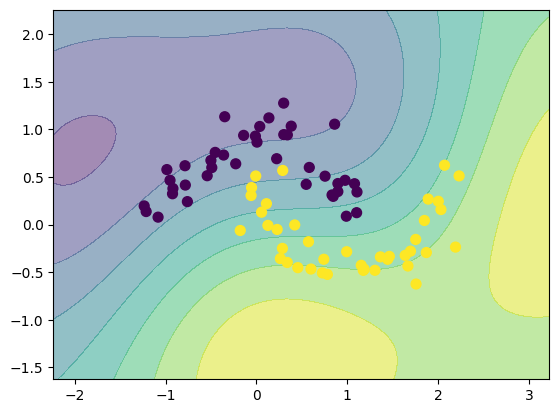

In [ ]:
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import pandas as pd

X, y = make_moons(n_samples=80, noise=0.15, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plt.show()

model = SVR(kernel='rbf', C=1.0, gamma=0.2)
model.fit(X, y)

#creating a plotting mesh and predicting points
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis') 
plt.show()





# Test 2: Fitted plot for random nonlinear (function) data

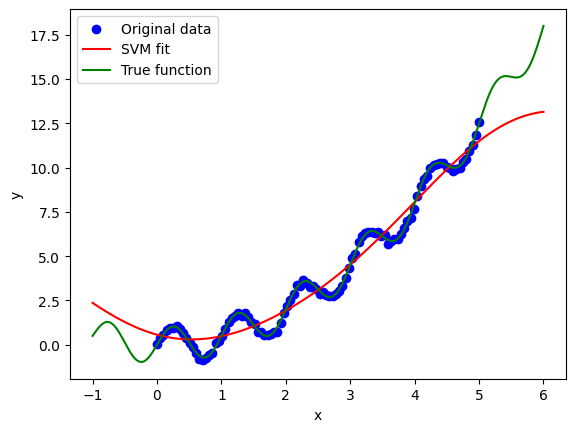

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import numpy as np

# Define the non-linear function
def f(x):
    return np.sin(2*np.pi*x) + 0.5*np.power(x, 2)

# Generate sample data
x = np.linspace(0, 5, 100)
y = f(x) + np.random.normal(0, 0.1, 100)  # Add some noise

# Create an SVM regressor with RBF kernel
model = SVR(kernel='rbf', C=100, gamma=0.1)

# Train the model on the data
model.fit(x.reshape(-1, 1), y)

# Create a prediction mesh
x_min, x_max = x.min() - 1, x.max() + 1
xx = np.linspace(x_min, x_max, 500)

# Make predictions on the mesh points
y_pred = model.predict(xx.reshape(-1, 1))

# Plot the original data and the SVM fit
plt.scatter(x, y, c='blue', label='Original data')
plt.plot(xx, y_pred, c='red', label='SVM fit')
plt.plot(xx, f(xx), c='green', label='True function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Test 3: Running This Test with Known Sample Data (Chiran's Calibration Data)

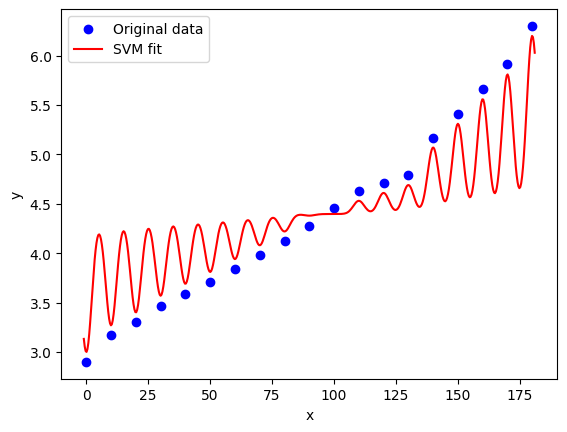

In [7]:
training_frame = pd.read_csv("trainingdata_old/training.csv")
training_frame.head()
x = training_frame['Angle'].to_numpy()
y = training_frame['at 489'].to_numpy()

# Create an SVM regressor with RBF kernel
model = SVR(kernel='rbf', C=100, gamma=0.1)

# Train the model on the data
model.fit(x.reshape(-1, 1), y)

# Create a prediction mesh
x_min, x_max = x.min() - 1, x.max() + 1
xx = np.linspace(x_min, x_max, 500)

# Make predictions on the mesh points
y_pred = model.predict(xx.reshape(-1, 1))

# Plot the original data and the SVM fit
plt.scatter(x, y, c='blue', label='Original data')
plt.plot(xx, y_pred, c='red', label='SVM fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load 3D Data
training_frame = pd.read_csv("trainingdata_old/training_old_3d.csv")  

# Extract Data
x = training_frame['Wavelength'].to_numpy()
y = training_frame['Angle'].to_numpy() 
z = training_frame['Voltage'].to_numpy()

# Combine x and y for input
X = np.column_stack((x, y))

# SVM with RBF Kernel (could experiment with other kernels)
model = SVR(kernel='rbf', C=100, gamma=0.1) 
model.fit(X,z)

# Get the min/max of each feature dimension
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1  # Min/max of the first feature
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # Min/max of the second feature

# Create the grid
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 500),
                       np.linspace(x2_min, x2_max, 500))

# Combine into input format for the model
xx_input = np.column_stack((xx1.ravel(), xx2.ravel()))

# Prediction
y_pred = model.predict(xx_input)

/tmp/ipykernel_8414/1972231268.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


3D Plot of the above result

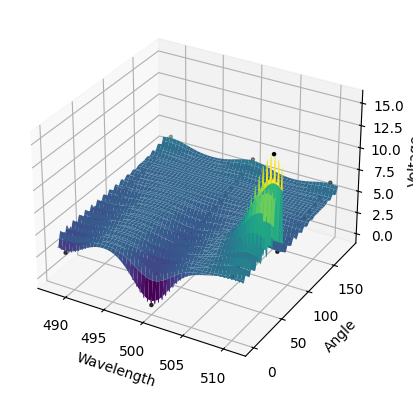

In [2]:
# Reshape the prediction back into the grid shape
y_pred = y_pred.reshape(xx1.shape)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(xx1, xx2, y_pred, cmap='viridis')

ax.scatter(X[:,0], X[:,1], z, c='black', marker='.')

# Labels
ax.set_xlabel('Wavelength')
ax.set_ylabel('Angle')
ax.set_zlabel('Voltage')

plt.show()

Save the above as html for rotating/viewing/etc.

In [8]:
import plotly.express as px
import plotly.graph_objects as go

# ... (Your code for the SVM model, X data, and predictions) ...

# Create a base figure (can be empty)
fig = go.Figure()

# Add the surface plot
fig.add_trace(go.Surface(x=xx1, y=xx2, z=y_pred.reshape(xx1.shape), 
                         colorscale='viridis', showscale=False))

# Add the scatter plot
fig.add_trace(go.Scatter3d(x=X[:, 0], y=X[:, 1], z=z,
                           mode='markers', 
                           marker=dict(color='black')))

# Customize titles if needed
fig.update_layout(title="SVM Prediction with Original Data")

# Export as HTML
fig.write_html("interactive_plot.html")

Contour plot of the same result

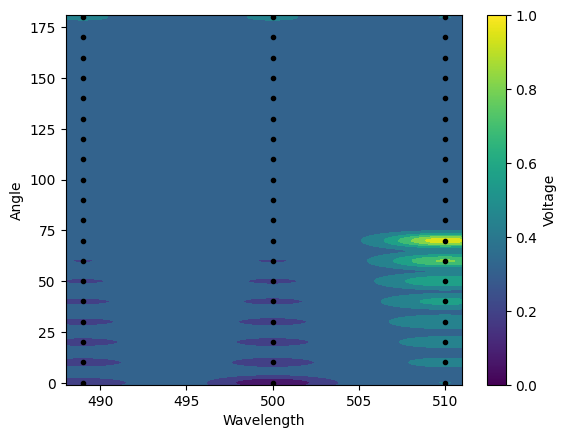

In [28]:
# Create a contour plot
plt.contourf(xx1, xx2, y_pred.reshape(xx1.shape), cmap='viridis')

# Labels
plt.xlabel('Wavelength')
plt.ylabel('Angle')

# Optional: Add original data points for comparison
plt.scatter(X[:,0], X[:,1], c='black', marker='.')

plt.colorbar(label='Voltage')
plt.show()

^^ This is weird